Image Shape (85, 164, 1, 1, 1)


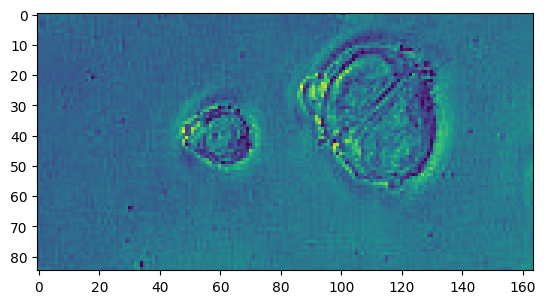

In [2]:
# inspect intensity image
from bfio import BioReader
import matplotlib.pyplot as plt

with BioReader("/mnt/hdd8/axle/dev/i2k_workshop/data_raw/intensity/eval_100_SKBR_ch2.ome.tif") as br:
    print(f"Image Shape {br.shape}")
    plt.imshow(br[:].squeeze())

Image Shape (85, 164, 1, 1, 1)


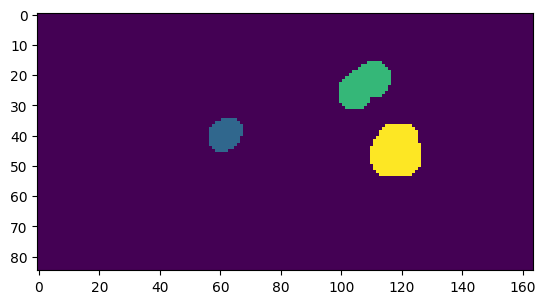

In [3]:
# inspect segmentation image
from bfio import BioReader
import matplotlib.pyplot as plt

with BioReader("/mnt/hdd8/axle/dev/i2k_workshop/data_raw/label/eval_100_SKBR_ch2.ome.tif") as br:
    print(f"Image Shape {br.shape}")
    plt.imshow(br[:].squeeze())

In [19]:
# Calculate mean of one image pair
from nyxus import Nyxus
int_image_path = ["/mnt/hdd8/axle/dev/i2k_workshop/data_raw/intensity/eval_100_SKBR_ch2.ome.tif"]         
seg_image_path = ["/mnt/hdd8/axle/dev/i2k_workshop/data_raw/label/eval_100_SKBR_ch2.ome.tif"]
nyx = Nyxus(["MEAN"])
feature_vals = nyx.featurize_files(int_image_path, seg_image_path)
feature_vals.head()


,mask_image,intensity_image,label,MEAN
0,eval_100_SKBR_ch2.ome.tif,eval_100_SKBR_ch2.ome.tif,1,79.250000
1,eval_100_SKBR_ch2.ome.tif,eval_100_SKBR_ch2.ome.tif,2,76.922280
2,eval_100_SKBR_ch2.ome.tif,eval_100_SKBR_ch2.ome.tif,3,83.330645


In [20]:
# Calculate a bunch of features for one image pair
int_image_path = ["/mnt/hdd8/axle/dev/i2k_workshop/data_raw/intensity/eval_100_SKBR_ch2.ome.tif"]         
seg_image_path = ["/mnt/hdd8/axle/dev/i2k_workshop/data_raw/label/eval_100_SKBR_ch2.ome.tif"]
nyx = Nyxus(["MIN", "MAX", "MEAN", "CIRCULARITY"])
feature_vals = nyx.featurize_files(int_image_path, seg_image_path)
feature_vals.head()

,mask_image,intensity_image,label,MAX,MEAN,MIN,CIRCULARITY
0,eval_100_SKBR_ch2.ome.tif,eval_100_SKBR_ch2.ome.tif,1,134.0,79.250000,20.0,1.197685
1,eval_100_SKBR_ch2.ome.tif,eval_100_SKBR_ch2.ome.tif,2,127.0,76.922280,21.0,1.119260
2,eval_100_SKBR_ch2.ome.tif,eval_100_SKBR_ch2.ome.tif,3,139.0,83.330645,11.0,1.116505


In [16]:
# Calculate all the intensity features of one image pair
int_image_path = ["/mnt/hdd8/axle/dev/i2k_workshop/data_raw/intensity/eval_100_SKBR_ch2.ome.tif"]         
seg_image_path = ["/mnt/hdd8/axle/dev/i2k_workshop/data_raw/label/eval_100_SKBR_ch2.ome.tif"]
nyx = Nyxus(["*ALL_INTENSITY*"])
feature_vals = nyx.featurize_files(int_image_path, seg_image_path)
feature_vals.head()

,mask_image,intensity_image,label,COV,COVERED_IMAGE_INTENSITY_RANGE,ENERGY,ENTROPY,EXCESS_KURTOSIS,HYPERFLATNESS,HYPERSKEWNESS,...,ROBUST_MEAN_ABSOLUTE_DEVIATION,ROOT_MEAN_SQUARED,SKEWNESS,STANDARD_DEVIATION,STANDARD_DEVIATION_BIASED,STANDARD_ERROR,VARIANCE,VARIANCE_BIASED,UNIFORMITY,UNIFORMITY_PIU
0,eval_100_SKBR_ch2.ome.tif,eval_100_SKBR_ch2.ome.tif,1,0.336110,0.890625,670338.0,2.850296,-0.755524,6.646054,-0.905278,...,21.375000,83.562477,-0.182249,26.636738,26.497641,2.718601,709.515789,702.125000,176.0,25.974026
1,eval_100_SKBR_ch2.ome.tif,eval_100_SKBR_ch2.ome.tif,2,0.277619,0.828125,1229548.0,2.860792,-0.249298,10.711811,-0.728188,...,20.190476,79.816759,-0.085898,21.355112,21.299716,1.537175,456.040803,453.677897,647.0,28.378378
2,eval_100_SKBR_ch2.ome.tif,eval_100_SKBR_ch2.ome.tif,3,0.269171,1.000000,1846380.0,2.684239,0.333610,18.322787,-2.421838,...,24.380952,86.284881,-0.154339,22.430178,22.384911,1.424318,503.112903,501.084222,1034.0,14.666667


In [27]:
# Calculate multiple feature groups of one image pair
int_image_path = ["/mnt/hdd8/axle/dev/i2k_workshop/data_raw/intensity/eval_100_SKBR_ch2.ome.tif"]         
seg_image_path = ["/mnt/hdd8/axle/dev/i2k_workshop/data_raw/label/eval_100_SKBR_ch2.ome.tif"]
nyx = Nyxus(["*ALL_INTENSITY*", "*basic_morphology*"])
feature_vals = nyx.featurize_files(int_image_path, seg_image_path)
feature_vals.head()

,mask_image,intensity_image,label,MEAN
0,eval_100_SKBR_ch2.ome.tif,eval_100_SKBR_ch2.ome.tif,1,79.250000
1,eval_100_SKBR_ch2.ome.tif,eval_100_SKBR_ch2.ome.tif,2,76.922280
2,eval_100_SKBR_ch2.ome.tif,eval_100_SKBR_ch2.ome.tif,3,83.330645


In [29]:
# Calculate one single feature of all the images from one directory 
from nyxus import Nyxus
int_image_dir_path = "/mnt/hdd8/axle/dev/i2k_workshop/data_raw/intensity"         
seg_image_dir_path = "/mnt/hdd8/axle/dev/i2k_workshop/data_raw/label"
nyx = Nyxus(["MEAN"])
feature_vals = nyx.featurize_directory(int_image_dir_path, seg_image_dir_path)
feature_vals.size

2108

In [53]:
# Calculate one single feature of a subset of images from one directory 
from nyxus import Nyxus
int_image_dir_path = "/mnt/hdd8/axle/dev/i2k_workshop/data_raw/intensity"         
seg_image_dir_path = "/mnt/hdd8/axle/dev/i2k_workshop/data_raw/label"
nyx = Nyxus(["MEAN"])
feature_vals = nyx.featurize_directory(int_image_dir_path, seg_image_dir_path, file_pattern="eval_1\\d+.ome.tif")
feature_vals.size

2108

In [8]:
# Read image pair as 2D numpy array and calculate features
from bfio import BioReader
import numpy as np
from nyxus import Nyxus

int_image_path = "/mnt/hdd8/axle/dev/i2k_workshop/data_raw/intensity/eval_100_SKBR_ch2.ome.tif"         
seg_image_path = "/mnt/hdd8/axle/dev/i2k_workshop/data_raw/label/eval_100_SKBR_ch2.ome.tif"

# load images as 2D numpy array
int_img = BioReader(int_image_path)
seg_img = BioReader(seg_image_path)
int_image_data = int_img[:].squeeze()
print(int_image_data.shape)
seg_image_data = seg_img[:].squeeze()
print(seg_image_data.shape)
int_img.close()
seg_img.close()

nyx = Nyxus(["MEAN"])
feature_vals = nyx.featurize(int_image_data, seg_image_data, ["img1"], ["img1"])
feature_vals.head()


(85, 164)
(85, 164)


,mask_image,intensity_image,label,MEAN
0,img1,img1,1,79.250000
1,img1,img1,2,76.922280
2,img1,img1,3,83.330645


In [10]:
import pandas as pd
feature_vals.to_csv("features.csv")

In [10]:
# Save output to arrow
from nyxus import Nyxus

int_image_path = ["/mnt/hdd8/axle/dev/i2k_workshop/data_raw/intensity/eval_100_SKBR_ch2.ome.tif"]         
seg_image_path = ["/mnt/hdd8/axle/dev/i2k_workshop/data_raw/label/eval_100_SKBR_ch2.ome.tif"]
nyx = Nyxus(["*ALL_INTENSITY*", "*basic_morphology*"])
nyx.create_arrow_file()
feature_vals = nyx.featurize_files(int_image_path, seg_image_path)
feature_vals.head()

,mask_image,intensity_image,label,COV,COVERED_IMAGE_INTENSITY_RANGE,ENERGY,ENTROPY,EXCESS_KURTOSIS,HYPERFLATNESS,HYPERSKEWNESS,...,UNIFORMITY,UNIFORMITY_PIU,AREA_PIXELS_COUNT,AREA_UM2,CENTROID_X,CENTROID_Y,BBOX_YMIN,BBOX_XMIN,BBOX_HEIGHT,BBOX_WIDTH
0,eval_100_SKBR_ch2.ome.tif,eval_100_SKBR_ch2.ome.tif,1,0.336110,0.890625,670338.0,2.850296,-0.755524,6.646054,-0.905278,...,176.0,25.974026,96.0,96.0,61.812500,39.843750,35.0,57.0,11.0,11.0
1,eval_100_SKBR_ch2.ome.tif,eval_100_SKBR_ch2.ome.tif,2,0.277619,0.828125,1229548.0,2.860792,-0.249298,10.711811,-0.728188,...,647.0,28.378378,193.0,193.0,107.787565,23.466321,16.0,100.0,16.0,17.0
2,eval_100_SKBR_ch2.ome.tif,eval_100_SKBR_ch2.ome.tif,3,0.269171,1.000000,1846380.0,2.684239,0.333610,18.322787,-2.421838,...,1034.0,14.666667,248.0,248.0,118.278226,45.310484,37.0,110.0,17.0,17.0


In [11]:
# Sanity Check arrow file
import vaex
df = vaex.open("NyxusFeatures.arrow")
df.head()

#,mask_image,intensity_image,label,COV,COVERED_IMAGE_INTENSITY_RANGE,ENERGY,ENTROPY,EXCESS_KURTOSIS,HYPERFLATNESS,HYPERSKEWNESS,INTEGRATED_INTENSITY,INTERQUARTILE_RANGE,KURTOSIS,MAX,MEAN,MEAN_ABSOLUTE_DEVIATION,MEDIAN,MEDIAN_ABSOLUTE_DEVIATION,MIN,MODE,P01,P10,P25,P75,P90,P99,QCOD,RANGE,ROBUST_MEAN,ROBUST_MEAN_ABSOLUTE_DEVIATION,ROOT_MEAN_SQUARED,SKEWNESS,STANDARD_DEVIATION,STANDARD_DEVIATION_BIASED,STANDARD_ERROR,VARIANCE,VARIANCE_BIASED,UNIFORMITY,UNIFORMITY_PIU,AREA_PIXELS_COUNT,AREA_UM2,CENTROID_X,CENTROID_Y,BBOX_YMIN,BBOX_XMIN,BBOX_HEIGHT,BBOX_WIDTH
0,eval_100_SKBR_ch2.ome.tif,eval_100_SKBR_ch2.ome.tif,1,0.33611,0.890625,670338,2.8503,-0.755524,6.64605,-0.905278,7608,40.47,2.24448,134,79.25,22.2865,81.5,22.2708,20,104,21.0944,41.204,60.47,100.94,111.998,132.906,0.250728,114,0,21.375,83.5625,-0.182249,26.6367,26.4976,2.7186,709.516,702.125,176,25.974,96,96,61.8125,39.8438,35,57,11,11
1,eval_100_SKBR_ch2.ome.tif,eval_100_SKBR_ch2.ome.tif,2,0.277619,0.828125,1.22955e+06,2.86079,-0.249298,10.7118,-0.728188,14846,27.2862,2.7507,127,76.9223,16.9502,77,16.9482,21,83,23.0458,48.1996,64.513,91.7992,103.404,123.894,0.174562,106,0,20.1905,79.8168,-0.0858978,21.3551,21.2997,1.53717,456.041,453.678,647,28.3784,193,193,107.788,23.4663,16,100,16,17
2,eval_100_SKBR_ch2.ome.tif,eval_100_SKBR_ch2.ome.tif,3,0.269171,1,1.84638e+06,2.68424,0.33361,18.3228,-2.42184,20666,28.64,3.33361,139,83.3306,17.4891,82.5,17.4677,11,82,20.5744,55.544,69.4,98.04,113.485,134.213,0.171046,128,0,24.381,86.2849,-0.154339,22.4302,22.3849,1.42432,503.113,501.084,1034,14.6667,248,248,118.278,45.3105,37,110,17,17
